In [ ]:
pip install transformers torch datasets scikit-learn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
df = pd.read_csv('/content/UNBER-text.csv')
df

,text,class,source,category
0,Me on my way to watch Oppenheimer After Berbie,Safe,Facebook,Safe
1,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,Adult,Facebook,Unsafe
2,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,Safe,Facebook,Safe
3,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,Safe,Facebook,Safe
4,ইন্ডিয়ান কাক্কু আহ সোনা গো আমার একদম পয়েন্টে গ...,Adult,Facebook,Unsafe
...,...,...,...,...
8260,"সাব্বাস,,,,,,,হিরো আলম ভাই,,,I Like U andI dis...",Safe,bangla_comment_dataset,Safe
8261,"আমার অনুরোধ আপনাদের নিকট, আপনারা দলের হাইকমান...",Safe,bangla_comment_dataset,Safe
8262,ভালো ছিলো কাজ,Safe,bangla_comment_dataset,Safe
8263,"হিরো আলম ভাইয়ার প্রতি সর্বখন নেক দোয়া রইল ,আর ...",Safe,bangla_comment_dataset,Safe


In [ ]:
df['category'].value_counts()

,count
category,
Safe,4662
Unsafe,3603


In [ ]:
df['class'].value_counts()

,count
class,
Safe,4662
Adult,1527
Harmful,1172
Suicidal,904


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df['category'], uniques = pd.factorize(df['category'])
uniques

Index(['Safe', 'Unsafe'], dtype='object')

In [ ]:
df['class'], cuniques = pd.factorize(df['class'])
cuniques

Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [ ]:
df

,text,class,source,category
0,Me on my way to watch Oppenheimer After Berbie,0,Facebook,0
1,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,1,Facebook,1
2,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,0,Facebook,0
3,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,0,Facebook,0
4,ইন্ডিয়ান কাক্কু আহ সোনা গো আমার একদম পয়েন্টে গ...,1,Facebook,1
...,...,...,...,...
8260,"সাব্বাস,,,,,,,হিরো আলম ভাই,,,I Like U andI dis...",0,bangla_comment_dataset,0
8261,"আমার অনুরোধ আপনাদের নিকট, আপনারা দলের হাইকমান...",0,bangla_comment_dataset,0
8262,ভালো ছিলো কাজ,0,bangla_comment_dataset,0
8263,"হিরো আলম ভাইয়ার প্রতি সর্বখন নেক দোয়া রইল ,আর ...",0,bangla_comment_dataset,0


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
df

,text,class,source,category
0,তোর বাসার সবাই রে চুদমু,1,toxic_comments,1
1,ইন্না লিল্লাহি ওয়া ইন্না ইলাইহি রাজিউন,0,bangla_comment_dataset,0
2,নাউযুবিললা।আল্লাহ হেদায়েত দাও।,0,bangla_comment_dataset,0
3,THE Breakfast,0,Facebook,0
4,চুইদা গুু বাইর কইরা ফেল্মু,2,toxic_comments,1
...,...,...,...,...
8260,"চমৎকার, কিভাবে পরিবর্তন হই",0,Facebook,0
8261,MunMum Islam,0,Facebook,0
8262,এখন তো মানুষ বন্দী হ‌য়ে গে‌ছে ক‌রোনার জন্য,0,bangla_comment_dataset,0
8263,পুরো বাক্যটি হচ্ছে এই যে দাদারা শুয়োরের বাচ্চ...,2,bengali_hate,1


In [ ]:
X = df['text']
y = df['category']

train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

test_texts, val_texts, test_labels, val_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, random_state=42, stratify=temp_labels
)

In [ ]:
from transformers import AutoTokenizer

# Load the tokenizer (you can use 'bert-base-multilingual-cased', 'xlm-roberta-base', or 'csebuetnlp/banglabert')
model_name = "csebuetnlp/banglabert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/119 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/528k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
import torch
from datasets import Dataset

# Convert data into Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_data = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})
test_data = Dataset.from_dict({"text": test_texts.tolist(), "label": test_labels.tolist()})

In [ ]:
def preprocess_function(examples):
    return tokenizer(
        examples['text'],
        padding=True,
        truncation=True,
        max_length=512,
)

In [ ]:
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)
test_data = test_data.map(preprocess_function, batched=True)

Map:   0%|          | 0/6612 [00:00<?, ? examples/s]

Map:   0%|          | 0/827 [00:00<?, ? examples/s]

Map:   0%|          | 0/826 [00:00<?, ? examples/s]

In [ ]:
train_data

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 6612
})

In [ ]:
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained(model_name)

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel

class BanglaBERT_LSTM(nn.Module):
    def __init__(self, lstm_hidden_size=256, lstm_layers=1, dropout=0.3):
        super(BanglaBERT_LSTM, self).__init__()

        # ✅ Load BanglaBERT inside the class
        self.bert = model

        # ✅ LSTM Layer (Bidirectional)
        self.lstm = nn.LSTM(input_size=768, hidden_size=lstm_hidden_size, num_layers=lstm_layers,
                            batch_first=True, bidirectional=True, dropout=dropout)

        # ✅ Fully connected classification layer
        self.fc = nn.Linear(lstm_hidden_size * 2, 1)  # ⬅ Single output for binary classification

        # ✅ Dropout layer for regularization
        self.dropout = nn.Dropout(dropout)

        # ✅ Use Binary Cross Entropy Loss
        self.criterion = nn.BCEWithLogitsLoss()

    def forward(self, input_ids, attention_mask, labels=None):
        # Get embeddings from BanglaBERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_states = outputs.last_hidden_state  # (batch_size, seq_len, 768)

        # Pass through BiLSTM
        lstm_out, _ = self.lstm(hidden_states)  # (batch_size, seq_len, hidden_size*2)
        lstm_out = lstm_out[:, -1, :]  # Take the last time step output

        # Pass through the classifier
        logits = self.fc(self.dropout(lstm_out))  # (batch_size, 1)

        # Compute loss if labels are provided
        loss = None
        if labels is not None:
            labels = labels.float().unsqueeze(1)  # ✅ Ensure correct shape
            loss = self.criterion(logits, labels)

        return (loss, logits) if loss is not None else logits

In [ ]:
model = BanglaBERT_LSTM()

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  warnings.warn(


In [ ]:
from transformers import TrainingArguments, EarlyStoppingCallback

In [ ]:
training_args = TrainingArguments(
    output_dir="./banglabert_lstm",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    logging_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
# pip install evaluate --quiet

In [ ]:
# import evaluate
# import numpy as np

# # Load metrics using the evaluate library
# f1_metric = evaluate.load("f1")
# precision_metric = evaluate.load("precision")
# recall_metric = evaluate.load("recall")

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # ✅ Apply Sigmoid since BCEWithLogitsLoss does not include it
    probs = torch.sigmoid(torch.tensor(logits))

    # ✅ Convert probabilities to binary predictions (0 or 1)
    predictions = (probs > 0.5).int().numpy()

    # ✅ Compute metrics for binary classification
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="binary", zero_division=1
    )

    acc = accuracy_score(labels, predictions)

    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [ ]:
# train_data.rename_column("label", "labels")
# val_data.rename_column("label", "labels")
# test_data.rename_column("label", "labels")

In [ ]:
def make_model_contiguous(model):
    for param in model.parameters():
        param.data = param.data.contiguous()  # ✅ Ensure tensor is contiguous
        if param.grad is not None:
            param.grad.data = param.grad.data.contiguous()

make_model_contiguous(model)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # Pretrained model
    args=training_args,                  # Updated training arguments
    train_dataset=train_data,            # Training data
    eval_dataset=val_data,               # Validation data
    tokenizer=tokenizer,                 # Tokenizer
    compute_metrics=compute_metrics,      # Updated metrics function
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

trainer.train()

<ipython-input-28-1ba8292ba6ea>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: arefinlabibndc19 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.457400,0.438481,0.801693,0.922747,0.595568,0.723906
2,0.291600,0.471369,0.824667,0.812139,0.778393,0.794908
3,0.193300,0.675899,0.805320,0.724215,0.894737,0.800496
4,0.097200,0.774473,0.828295,0.790451,0.825485,0.807588


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.457400,0.438481,0.801693,0.922747,0.595568,0.723906
2,0.291600,0.471369,0.824667,0.812139,0.778393,0.794908
3,0.193300,0.675899,0.805320,0.724215,0.894737,0.800496
4,0.097200,0.774473,0.828295,0.790451,0.825485,0.807588
5,0.063400,0.835044,0.828295,0.788918,0.828255,0.808108


TrainOutput(global_step=4135, training_loss=0.2205563223491701, metrics={'train_runtime': 3526.6092, 'train_samples_per_second': 9.374, 'train_steps_per_second': 1.173, 'total_flos': 0.0, 'train_loss': 0.2205563223491701, 'epoch': 5.0})

In [ ]:
import numpy as np
from sklearn.metrics import classification_report
import torch

# Get predictions from the trainer
predictions = trainer.predict(test_data)

# ✅ Convert logits to probabilities using sigmoid
probs = torch.sigmoid(torch.tensor(predictions.predictions))

# ✅ Convert probabilities to binary labels (threshold = 0.5)
predicted_labels = (probs > 0.5).int().numpy()

# ✅ Print classification report for binary classification
print(classification_report(test_labels, predicted_labels, digits=4))

              precision    recall  f1-score   support

           0     0.8559    0.8541    0.8550       466
           1     0.8116    0.8139    0.8128       360

    accuracy                         0.8366       826
   macro avg     0.8338    0.8340    0.8339       826
weighted avg     0.8366    0.8366    0.8366       826



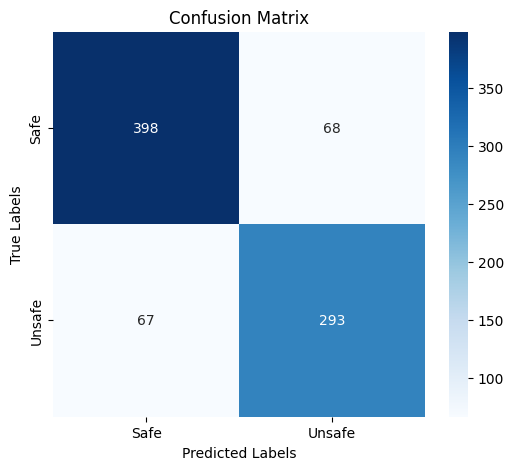

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=uniques, yticklabels=uniques)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainer.save_model("/content/drive/MyDrive/SafeReels-664/Models/Text_models/BB-h1")